# Sweetness Prediction using lasso and ridge 

## Loading dataset

In [66]:
sp <- read.csv("C:/Users/Shubham Shukla/Desktop/internship/new/sweetness-prediction/data/properties/ecfp.csv")

In [67]:
str(sp)

'data.frame':	200 obs. of  2050 variables:
 $ smiles   : Factor w/ 200 levels "[Ca].S(=O)(=O)([O-])NC1CCCCC1",..: 64 180 1 68 4 196 9 197 5 153 ...
 $ Sweetness: num  160 0.4 40 160 300 300 50 300 300 0.4 ...
 $ X        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.1      : int  0 1 0 0 1 1 0 1 1 1 ...
 $ X.2      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.3      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.4      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.5      : int  1 0 0 1 0 0 0 0 0 0 ...
 $ X.6      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.7      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.8      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.9      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.10     : int  0 1 0 0 0 0 0 0 0 1 ...
 $ X.11     : int  0 0 0 0 1 0 0 0 1 0 ...
 $ X.12     : int  0 1 0 0 0 0 0 0 1 1 ...
 $ X.13     : int  0 1 0 0 0 0 0 0 0 1 ...
 $ X.14     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.15     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.16     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.17     : int  0 0 0 0 1 1 0 1 1 0 ...
 $ X.18     : int

In [68]:
library(glmnet)
library(caTools)
set.seed(123)

In [69]:
sp <- drop(sp[-1])
str(sp)

'data.frame':	200 obs. of  2049 variables:
 $ Sweetness: num  160 0.4 40 160 300 300 50 300 300 0.4 ...
 $ X        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.1      : int  0 1 0 0 1 1 0 1 1 1 ...
 $ X.2      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.3      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.4      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.5      : int  1 0 0 1 0 0 0 0 0 0 ...
 $ X.6      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.7      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.8      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.9      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.10     : int  0 1 0 0 0 0 0 0 0 1 ...
 $ X.11     : int  0 0 0 0 1 0 0 0 1 0 ...
 $ X.12     : int  0 1 0 0 0 0 0 0 1 1 ...
 $ X.13     : int  0 1 0 0 0 0 0 0 0 1 ...
 $ X.14     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.15     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.16     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.17     : int  0 0 0 0 1 1 0 1 1 0 ...
 $ X.18     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.19     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.20     : int  0 0 0 0 0 0 0 0 0

### Making training and testing set 

In [70]:
split <- sample.split(sp$Sweetness, SplitRatio = 0.75)
data_train <- subset(sp, split == TRUE)
data_test <- subset(sp,split == F)

In [71]:
# Training data matrix
trainx <- data_train[2:length(sp)]
trainy <- data_train$Sweetness

#Testing Data matrix
testx <- data_test[2:length(sp)]
testy <- data_test$Sweetness

### Using lasso and ridge regression 

In [72]:
x <- model.matrix(Sweetness ~. -1, data = data_train)
y <- data_train$Sweetness

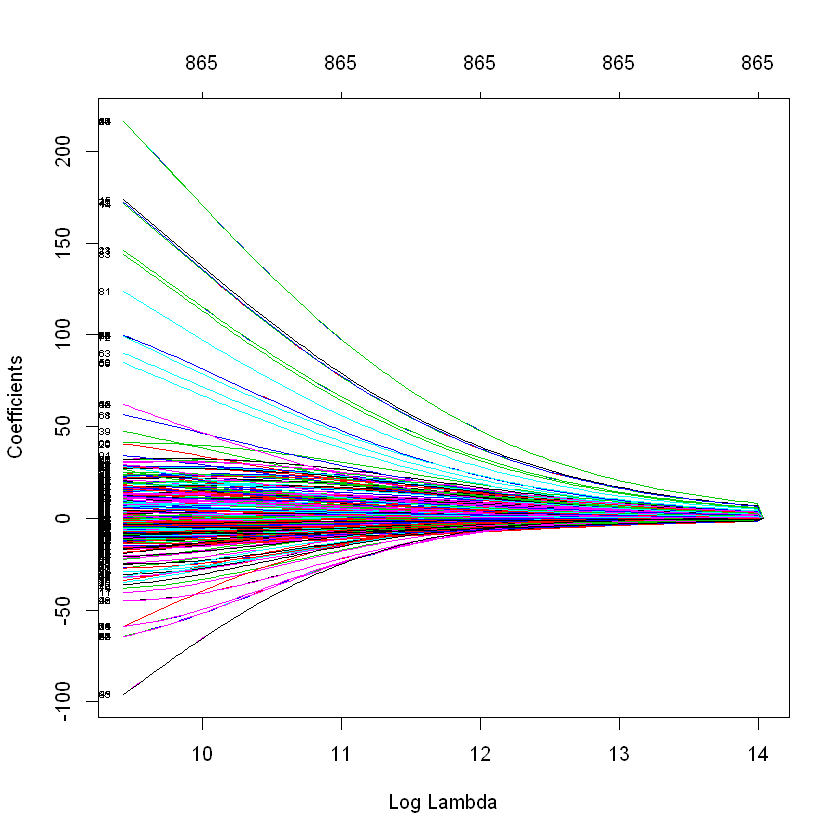

In [73]:
fit.ridge=glmnet(x,y,alpha=0)
plot(fit.ridge,xvar="lambda",label=TRUE)

### Using ridge to select model 

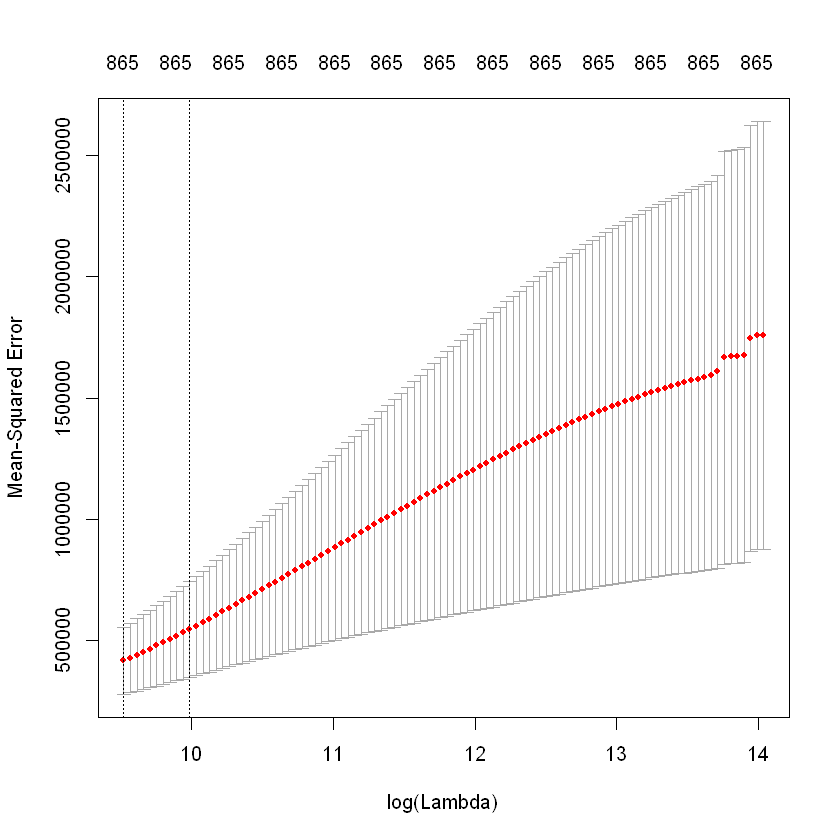

In [74]:
cv.ridge=cv.glmnet(x,y,alpha=0)
plot(cv.ridge)

### Using lasso  

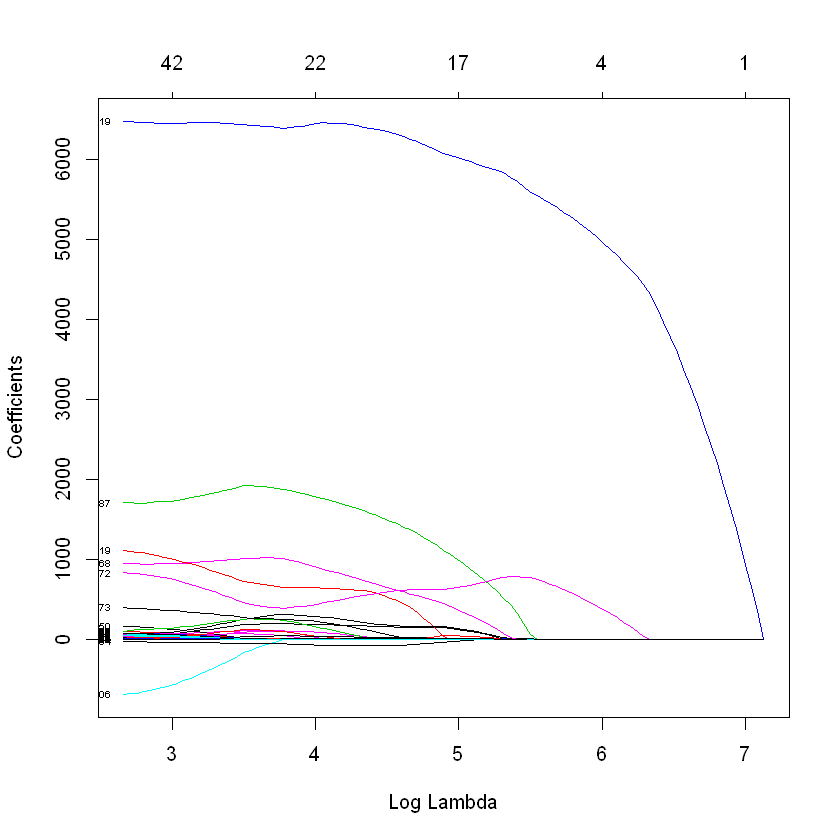

In [75]:
fit.lasso=glmnet(x,y,alpha= 1)
plot(fit.lasso,xvar="lambda",label=TRUE)

### Using cross validation

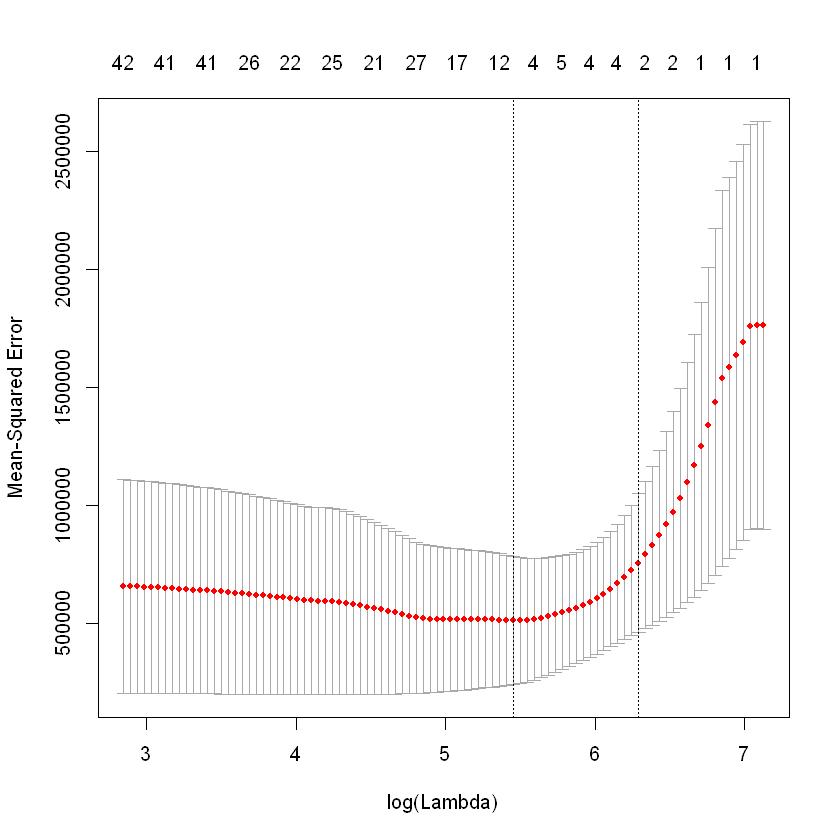

In [76]:
cv.lasso=cv.glmnet(x,y)
plot(cv.lasso)

### Coefficient extraction

In [77]:
coef(cv.lasso)

2049 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept) 1.910550e+02
X           .           
X.1         .           
X.2         .           
X.3         .           
X.4         .           
X.5         .           
X.6         .           
X.7         .           
X.8         .           
X.9         .           
X.10        .           
X.11        .           
X.12        .           
X.13        .           
X.14        .           
X.15        .           
X.16        .           
X.17        .           
X.18        .           
X.19        .           
X.20        .           
X.21        .           
X.22        .           
X.23        .           
X.24        .           
X.25        .           
X.26        .           
X.27        .           
X.28        .           
X.29        .           
X.30        .           
X.31        .           
X.32        .           
X.33        .           
X.34        .           
X.35        .           
X.36  

### Train model

In [82]:
test_x <- model.matrix(Sweetness ~. -1, data = data_test)
test_y <- data_test$Sweetness

In [93]:
pred=predict(lasso.tr,test_x)
pred

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s87,s88,s89,s90,s91,s92,s93,s94,s95,s96
5,307.3939,298.1928,289.4100,281.0263,273.0237,265.3848,258.0931,251.1328,244.4889,238.1469,...,199.88206,204.69776,208.88474,212.4754,216.19760,220.285145,224.050236,227.510733,230.877845,234.431285
10,307.3939,298.1928,289.4100,281.0263,273.0237,265.3848,258.0931,251.1328,244.4889,238.1469,...,12.10766,11.59507,11.09248,10.5794,10.14218,9.753665,9.349022,8.959175,8.566073,8.213432
13,307.3939,298.1928,289.4100,281.0263,273.0237,265.3848,258.0931,251.1328,244.4889,238.1469,...,199.88206,204.69776,208.88474,212.4754,216.19760,220.285145,224.050236,227.510733,230.877845,234.431285
14,307.3939,298.1928,289.4100,281.0263,273.0237,265.3848,258.0931,251.1328,244.4889,238.1469,...,2811.90088,2840.96967,2866.17211,2887.3485,2910.83153,2934.813456,2956.054262,2970.907447,2983.316430,2996.354428
20,307.3939,298.1928,289.4100,281.0263,273.0237,265.3848,258.0931,251.1328,244.4889,238.1469,...,238.81380,236.89111,235.27881,233.9247,232.36138,230.697910,229.002122,226.768418,224.683237,222.297940
21,307.3939,298.1928,289.4100,281.0263,273.0237,265.3848,258.0931,251.1328,244.4889,238.1469,...,238.81380,236.89111,235.27881,233.9247,232.36138,230.697910,229.002122,226.768418,224.683237,222.297940
25,307.3939,298.1928,289.4100,281.0263,273.0237,265.3848,258.0931,251.1328,244.4889,238.1469,...,12.10766,11.59507,11.09248,10.5794,10.14218,9.753665,9.349022,8.959175,8.566073,8.213432
31,307.3939,298.1928,289.4100,281.0263,273.0237,265.3848,258.0931,251.1328,244.4889,238.1469,...,12.10766,11.59507,11.09248,10.5794,10.14218,9.753665,9.349022,8.959175,8.566073,8.213432
40,307.3939,298.1928,289.4100,281.0263,273.0237,265.3848,258.0931,251.1328,244.4889,238.1469,...,12.10766,11.59507,11.09248,10.5794,10.14218,9.753665,9.349022,8.959175,8.566073,8.213432
45,307.3939,298.1928,289.4100,281.0263,273.0237,265.3848,258.0931,251.1328,244.4889,238.1469,...,12.10766,11.59507,11.09248,10.5794,10.14218,9.753665,9.349022,8.959175,8.566073,8.213432


[1] 140.1802

2049 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  1.027016e+02
X            .           
X.1          .           
X.2          .           
X.3          .           
X.4          .           
X.5          .           
X.6          .           
X.7          .           
X.8          .           
X.9          .           
X.10         .           
X.11         .           
X.12         .           
X.13         .           
X.14         .           
X.15         .           
X.16         .           
X.17         .           
X.18         .           
X.19         .           
X.20         .           
X.21         .           
X.22         .           
X.23         .           
X.24         .           
X.25         .           
X.26         .           
X.27         .           
X.28         .           
X.29         .           
X.30         .           
X.31         .           
X.32         .           
X.33         .           
X.34         .      

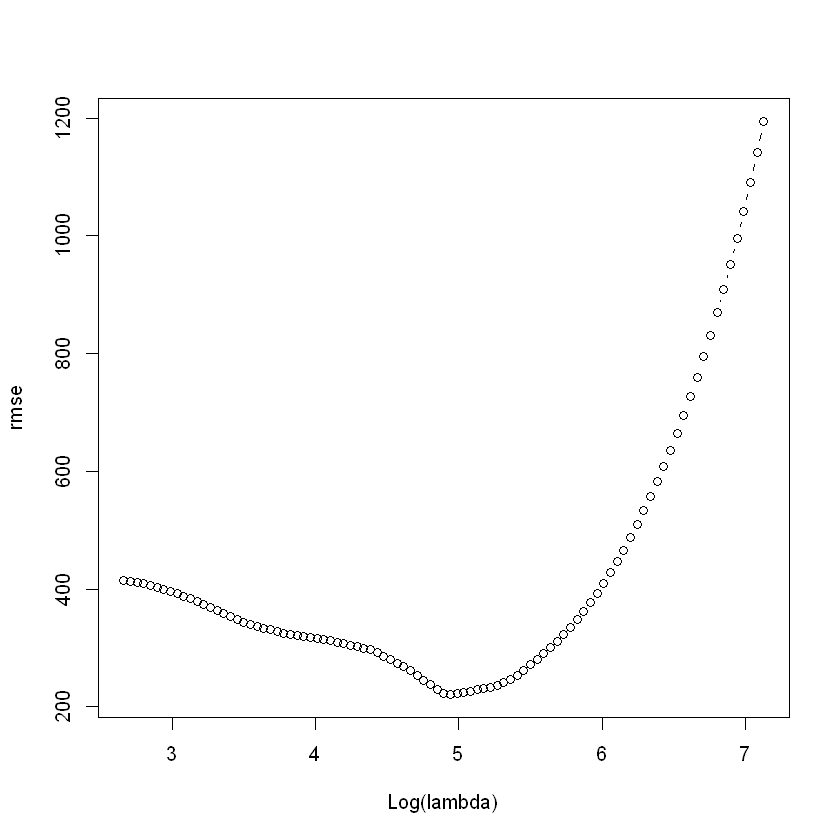

In [84]:
rmse= sqrt(apply((test_y - pred)^2,2,mean))
plot(log(lasso.tr$lambda),rmse,type="b",xlab="Log(lambda)")
lam.best=lasso.tr$lambda[order(rmse)[1]]
lam.best
coef(lasso.tr,s=lam.best)

In [88]:
sse <- sum((pred - test_y)^2)
sst <- sum((test_y - mean(test_y))^2)
sse
sst

[1] 974665738

[1] 62374386

In [103]:
dim(pred)

[1] 44 97


Call:  glmnet(x = x, y = y) 

      Df   %Dev  Lambda
 [1,]  0 0.0000 1248.00
 [2,]  1 0.0799 1191.00
 [3,]  1 0.1527 1137.00
 [4,]  1 0.2190 1085.00
 [5,]  1 0.2795 1036.00
 [6,]  1 0.3346  988.90
 [7,]  2 0.3847  944.00
 [8,]  1 0.4305  901.10
 [9,]  2 0.4721  860.10
[10,]  1 0.5101  821.00
[11,]  2 0.5447  783.70
[12,]  2 0.5762  748.10
[13,]  3 0.6049  714.10
[14,]  2 0.6311  681.60
[15,]  3 0.6549  650.70
[16,]  2 0.6766  621.10
[17,]  3 0.6964  592.90
[18,]  2 0.7145  565.90
[19,]  4 0.7332  540.20
[20,]  4 0.7517  515.60
[21,]  4 0.7685  492.20
[22,]  4 0.7839  469.80
[23,]  4 0.7978  448.50
[24,]  4 0.8106  428.10
[25,]  4 0.8222  408.60
[26,]  4 0.8328  390.10
[27,]  4 0.8424  372.30
[28,]  4 0.8512  355.40
[29,]  4 0.8592  339.30
[30,]  5 0.8665  323.80
[31,]  4 0.8731  309.10
[32,]  4 0.8792  295.10
[33,]  4 0.8847  281.70
[34,]  4 0.8897  268.90
[35,]  4 0.8943  256.60
[36,]  9 0.8997  245.00
[37,] 10 0.9059  233.80
[38,] 10 0.9116  223.20
[39,] 12 0.9170  213.10
[40,] 19 

[1] 44 97

[1] 140.1802

2049 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  1.027016e+02
X            .           
X.1          .           
X.2          .           
X.3          .           
X.4          .           
X.5          .           
X.6          .           
X.7          .           
X.8          .           
X.9          .           
X.10         .           
X.11         .           
X.12         .           
X.13         .           
X.14         .           
X.15         .           
X.16         .           
X.17         .           
X.18         .           
X.19         .           
X.20         .           
X.21         .           
X.22         .           
X.23         .           
X.24         .           
X.25         .           
X.26         .           
X.27         .           
X.28         .           
X.29         .           
X.30         .           
X.31         .           
X.32         .           
X.33         .           
X.34         .      

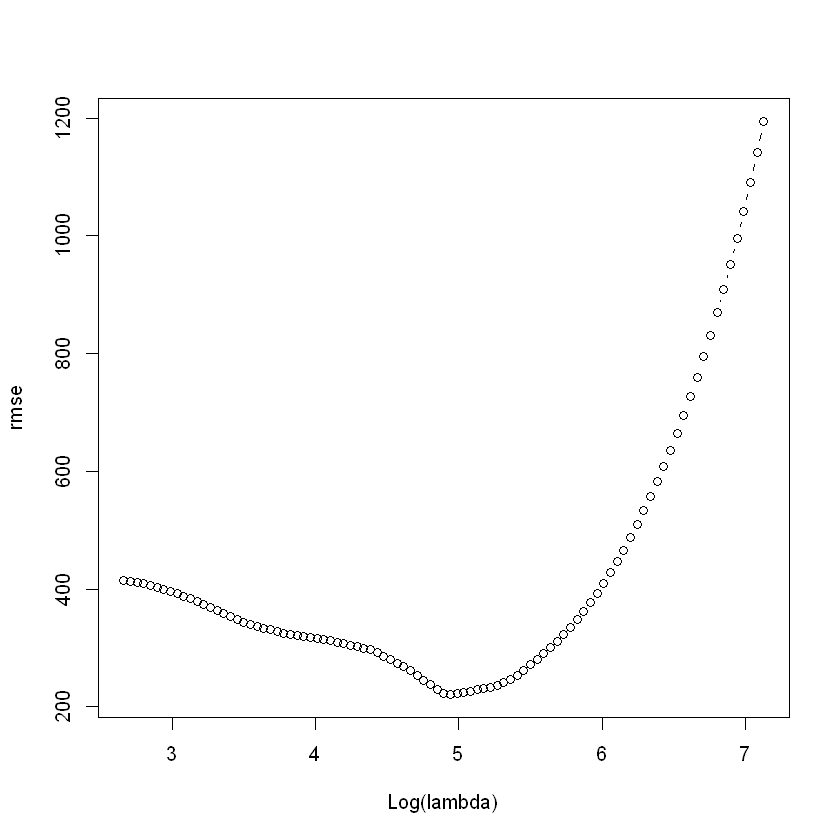

In [104]:
lasso.tr=glmnet(x,y)
lasso.tr
pred=predict(lasso.tr,test_x)
dim(pred)
rmse= sqrt(apply((test_y-pred)^2,2,mean))
plot(log(lasso.tr$lambda),rmse,type="b",xlab="Log(lambda)")
lam.best=lasso.tr$lambda[order(rmse)[1]]
lam.best
coef(lasso.tr,s=lam.best)